In [2]:
import numpy as np

class ART1:
    def __init__(self, input_size, num_categories, vigilance=0.7):
        self.input_size = input_size
        self.num_categories = num_categories
        self.vigilance = vigilance
        self.weights = np.ones((num_categories, input_size))  # Inicializa pesos en 1

    def train(self, inputs):
        for input_vector in inputs:
            # Comparación de cada entrada con categorías existentes
            matched_category = self.find_category(input_vector)
            if matched_category is not None:
                self.update_weights(matched_category, input_vector)
            else:
                print("No match found; input cannot be categorized with current vigilance.")

    def find_category(self, input_vector):
        for i in range(self.num_categories):
            category_weight = self.weights[i]
            # Prueba de coincidencia con la categoría i
            if np.all(input_vector <= category_weight):
                #match_ratio = np.sum(input_vector) / np.sum(category_weight)
                #match_ratio = np.sum(np.logical_and(input_vector, category_weight)) / np.sum(input_vector)
                match_ratio = np.sum(input_vector == category_weight) / self.input_size
                if match_ratio >= self.vigilance:
                    return i  # Categoría encontrada
        return None  # No coincide con ninguna categoría

    def update_weights(self, category, input_vector):
        # Actualiza pesos para la categoría encontrada
        self.weights[category] *= input_vector
        print(f"Updated category {category}: {self.weights[category]}")

# Prueba del sistema ART1
inputs = np.array([
    [1, 1, 0, 0],
    [1, 1, 0, 1],
    [0, 0, 1, 1],
    [0, 0, 1, 0]
])

# Crea una instancia de ART1 con 2 categorías
art1 = ART1(input_size=4, num_categories=2, vigilance=0.3)
art1.train(inputs)


Updated category 0: [1. 1. 0. 0.]
Updated category 1: [1. 1. 0. 1.]
No match found; input cannot be categorized with current vigilance.
No match found; input cannot be categorized with current vigilance.


In [4]:
print(art1.find_category([0, 0, 0, 1]))  # Debería coincidir con la categoría 0

1


In [14]:
import numpy as np

class ART1:
    def __init__(self, input_size, max_categories=10, vigilance=0.7):
        self.input_size = input_size
        self.vigilance = vigilance
        self.max_categories = max_categories
        self.categories = 0  # Contador de categorías activas
        self.weights = np.ones((max_categories, input_size))  # Inicializa los pesos

    def train(self, inputs):
        for input_vector in inputs:
            print(f"\nProcessing input: {input_vector}")
            matched_category = self.find_category(input_vector)
            
            if matched_category is not None:
                print(f"Matched with category {matched_category}")
                self.update_weights(matched_category, input_vector)
            else:
                if self.categories < self.max_categories:
                    print(f"Creating new category {self.categories}")
                    self.weights[self.categories] = input_vector
                    self.categories += 1
                else:
                    print("Maximum number of categories reached!")

    def find_category(self, input_vector):
        for i in range(self.categories):
            category_weight = self.weights[i]
            # Verifica si el patrón es compatible con la categoría
            #if np.all(input_vector <= category_weight):
            match_ratio = np.sum(np.logical_and(input_vector, category_weight)) / np.sum(input_vector)
            if match_ratio >= self.vigilance:
                return i  # Categoría encontrada
        return None  # No hay coincidencia
    
    def update_weights(self, category, input_vector):
        self.weights[category] *= input_vector  # Actualiza pesos con la intersección
        print(f"Updated category {category} weights: {self.weights[category]}")

    def classify(self, input_vector):
        matched_category = self.find_category(input_vector)
        return matched_category if matched_category is not None else "Unknown"

# Prueba del sistema ART1
inputs = np.array([
    [1, 1, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1],  # Similar al primer patrón
    [0, 0, 1, 1, 1]   # Similar al tercero
])

art1 = ART1(input_size=5, vigilance=0.8)
art1.train(inputs)

# Clasificación de un nuevo patrón
new_pattern = np.array([1, 1, 0, 1, 1])
category = art1.classify(new_pattern)
print(f"\nNew pattern {new_pattern} classified as category {category}")



Processing input: [1 1 0 0 1]
Creating new category 0

Processing input: [1 1 0 1 1]
Creating new category 1

Processing input: [0 0 1 1 0]
Creating new category 2

Processing input: [0 0 1 0 0]
Matched with category 2
Updated category 2 weights: [0. 0. 1. 0. 0.]

Processing input: [1 1 0 0 1]
Matched with category 0
Updated category 0 weights: [1. 1. 0. 0. 1.]

Processing input: [0 0 1 1 1]
Creating new category 3

New pattern [1 1 0 1 1] classified as category 1


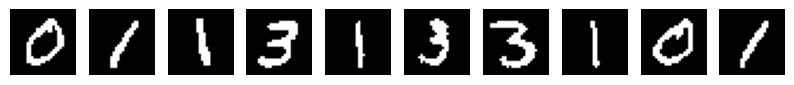


Processing sample 1/10
Creating new category 0

Processing sample 2/10
Creating new category 1

Processing sample 3/10
Matched with category 1

Processing sample 4/10
Creating new category 2

Processing sample 5/10
Matched with category 1

Processing sample 6/10
Matched with category 1

Processing sample 7/10
Creating new category 3

Processing sample 8/10
Matched with category 1

Processing sample 9/10
Matched with category 0

Processing sample 10/10
Matched with category 1

Classify number 0 as  0
Classify number 1 as  1


In [7]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class ART1:
    def __init__(self, input_size, max_categories=10, vigilance=0.7):
        self.input_size = input_size
        self.vigilance = vigilance
        self.max_categories = max_categories
        self.categories = 0  # Contador de categorías activas
        self.weights = np.ones((max_categories, input_size))  # Inicializa los pesos

    def train(self, inputs, labels):
        self.labels = np.full(self.max_categories, -1)  # Etiquetas de las categorías
        for idx, input_vector in enumerate(inputs):
            print(f"\nProcessing sample {idx + 1}/{len(inputs)}")
            matched_category = self.find_category(input_vector)

            if matched_category is not None:
                print(f"Matched with category {matched_category}")
                self.update_weights(matched_category, input_vector)
            else:
                if self.categories < self.max_categories:
                    print(f"Creating new category {self.categories}")
                    self.weights[self.categories] = input_vector
                    self.labels[self.categories] = labels[idx]
                    self.categories += 1
                else:
                    print("Maximum number of categories reached!")

    def find_category(self, input_vector):
        for i in range(self.categories):
            category_weight = self.weights[i]
            #if np.all(input_vector <= category_weight):
            #match_ratio = np.sum(np.logical_and(input_vector, category_weight)) / np.sum(input_vector)
            match_ratio = np.sum(input_vector == category_weight) / self.input_size
            if match_ratio >= self.vigilance:
                return i
        return None

    def update_weights(self, category, input_vector):
        self.weights[category] *= input_vector  # Actualiza con la intersección

    def classify(self, input_vector):
        matched_category = self.find_category(input_vector)
        return self.labels[matched_category] if matched_category is not None else -1

# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocesamiento: Convertir a binario
def preprocess_mnist(data, threshold=128):
    return (data > threshold).astype(int).reshape(len(data), -1)

# Tomamos algunos numeros como entrenamiento
train_digits = [0, 1, 3]
selected_images = np.where(np.isin(y_train, train_digits))[0]
selected_images = selected_images[:10]  # Limitar a 100 imágenes

x_train = preprocess_mnist(x_train[selected_images])
y_train = y_train[selected_images]

# MOstramos algunos ejemplos
fig, axes = plt.subplots(1, 10, figsize=(10, 1))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
plt.show()

# Entrenar el modelo ART1
art1 = ART1(input_size=784, vigilance=0.85)
art1.train(x_train, y_train)

print("\nClassify number 0 as ", art1.classify(x_train[0]))
print("Classify number 1 as ", art1.classify(x_train[1]))